In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Path to your organized dataset
dataset_path = r"C:\Users\vihan\OneDrive\Desktop\organize"

# Image parameters
img_size = (224, 224)
batch_size = 32

# Load data using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the model
model.save("medicinal_plant_model.h5")

# --- Optional: Predict on a new image ---
def predict_image(img_path):
    img = load_img(img_path, target_size=img_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title("🌿 Input Image")
    plt.show()
    
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]
    print(f"🔍 Predicted class: {predicted_class}")

# Example usage:
# predict_image(r"C:\Users\vihan\OneDrive\Desktop\organize\Mint\mint1.jpg")


In [6]:
model.save("medicinal_plant_classifier.keras")


In [9]:
from tensorflow.keras.models import load_model
model = load_model("medicinal_plant_classifier.keras", compile=False)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"C:\Users\vihan\OneDrive\Desktop\organize"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1479 images belonging to 30 classes.
Found 356 images belonging to 30 classes.


In [16]:
# 1. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 2. Fit the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8435 - loss: 0.4883 - val_accuracy: 0.7416 - val_loss: 1.1652
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8817 - loss: 0.3857 - val_accuracy: 0.7219 - val_loss: 1.2535
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8843 - loss: 0.3536 - val_accuracy: 0.7416 - val_loss: 1.3131
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9110 - loss: 0.2618 - val_accuracy: 0.7725 - val_loss: 1.1648
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9163 - loss: 0.2641 - val_accuracy: 0.7444 - val_loss: 1.3166
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9160 - loss: 0.2304 - val_accuracy: 0.7444 - val_loss: 1.4418
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9337 - loss: 0.2219 - val_accuracy: 0.7416 - val_loss: 1.3651
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9358 - loss: 0.1974 - val_accuracy: 0.7472 - val

In [18]:
# 1. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 2. Fit the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']
['AI-S-004.jpg', 'AI-S-005.jpg', 'AI-S-006.jpg'

In [20]:
import os

folder_path = r"C:\Users\vihan\OneDrive\Desktop\organize\Azadirachta indica (Neem)"
print("📂 Files in folder:")
print(os.listdir(folder_path))


📂 Files in folder:
['AI-S-004.jpg', 'AI-S-005.jpg', 'AI-S-006.jpg', 'AI-S-007.jpg', 'AI-S-008.jpg', 'AI-S-009.jpg', 'AI-S-010.jpg', 'AI-S-011.jpg', 'AI-S-012.jpg', 'AI-S-013.jpg', 'AI-S-014.jpg', 'AI-S-015.jpg', 'AI-S-016.jpg', 'AI-S-017.jpg', 'AI-S-018.jpg', 'AI-S-019.jpg', 'AI-S-020.jpg', 'AI-S-021.jpg', 'AI-S-022.jpg', 'AI-S-023.jpg', 'AI-S-024.jpg', 'AI-S-025.jpg', 'AI-S-026.jpg', 'AI-S-027.jpg', 'AI-S-028.jpg', 'AI-S-029.jpg', 'AI-S-030.jpg', 'AI-S-031.jpg', 'AI-S-032.jpg', 'AI-S-033.jpg', 'AI-S-034.jpg', 'AI-S-035.jpg', 'AI-S-036.jpg', 'AI-S-037.jpg', 'AI-S-038.jpg', 'AI-S-039.jpg', 'AI-S-040.jpg', 'AI-S-041.jpg', 'AI-S-042.jpg', 'AI-S-043.jpg', 'AI-S-044.jpg', 'AI-S-045.jpg', 'AI-S-046.jpg', 'AI-S-047.jpg', 'AI-S-048.jpg', 'AI-S-049.jpg', 'AI-S-050.jpg', 'AI-S-051.jpg', 'AI-S-052.jpg', 'AI-S-053.jpg', 'AI-S-054.jpg', 'AI-S-055.jpg', 'AI-S-056.jpg', 'AI-S-057.jpg', 'AI-S-058.jpg', 'AI-S-059.jpg', 'AI-S-060.jpg', 'AI-S-061.jpg', 'AI-S-062.jpg', 'AI-S-063.jpg']


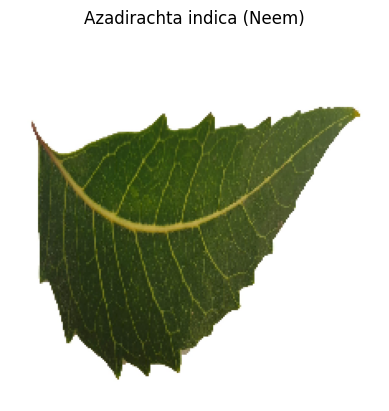

In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = r"C:\Users\vihan\OneDrive\Desktop\organize\Azadirachta indica (Neem)\AI-S-005.jpg"

# Load and show image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Azadirachta indica (Neem)")
plt.show()
